# Assignment simple linear regression

* We will predict employee salaries from different employee characteristics (or features). We are going to use a simple supervised learning technique: linear regression.
* We want to build a simple model to determine how well Years Worked predicts an employee’s salary.

Import the data salary.csv to a Jupyter Notebook. A description of the variables is given in Salary Metadata. You will need the packages matplotlib, pandas and statsmodels.

In [16]:
import pandas as pd
import numpy as np 
from sklearn import datasets,linear_model
import matplotlib.pyplot as plt
import statsmodels as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
raw_data = pd.read_csv('salary.csv')

* finding missing values
* filling missing values

In [17]:
raw_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

there is only one missing values in the column salary

In [18]:
raw_data['salary']=raw_data.salary.fillna(raw_data.salary.mean())

### 1. Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

* splitting data
* finding missing values


In [20]:
train_data, test_data = train_test_split(raw_data, test_size=0.2)
train_data.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

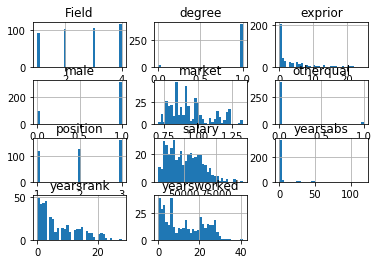

In [21]:
train_data.hist(bins=35)
plt.show()

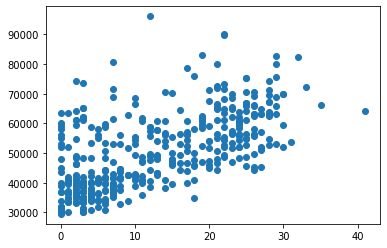

In [22]:
plt.scatter(x='yearsworked', y='salary', data=train_data)
plt.show()

In [23]:
y_train = train_data['salary']
x_train = train_data['yearsworked']
x = sm.add_constant(x_train)
results = sm.OLS(y_train,x).fit()
results.summary()

/home/recruit/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     261.2
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           8.63e-46
Time:                        15:23:48   Log-Likelihood:                -4370.6
No. Observations:                 411   AIC:                             8745.
Df Residuals:                     409   BIC:                             8753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.979e+04    823.071     48.341      0.000    3.82e+04    4.14e+04
yearsworked   840.1199     51.981     16.162      0.000     737.936     942.304
==============================================================================
Omnibus:                       77.206   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.579
Skew:                           1.138   Prob(JB):                     8.87e-28
Kurtosis:                       4.449   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

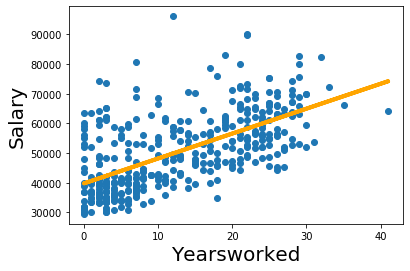

In [24]:
plt.scatter(x='yearsworked', y='salary', data=train_data)
yhat = 840.1199*x_train +39790
fig = plt.plot(x_train, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Yearsworked', fontsize =20)
plt.ylabel('Salary', fontsize =20)
plt.show()

In [8]:
x_train

461     7
201    16
440    10
469    13
417     4
       ..
298     2
15      2
143    11
302    19
455     7
Name: yearsworked, Length: 411, dtype: int64

In [9]:
from sklearn.linear_model import LinearRegression
LinearRegression().fit(y_train, x_train)

ValueError: Expected 2D array, got 1D array instead:
array=[37615.         53010.         41915.         48065.
 40356.         62211.         63144.         58982.
 71605.         73349.         40512.         54701.
 54222.         50946.52744859 52738.91406    55227.
 46601.         58471.         34206.         71142.
 36869.         46843.         62587.         43188.
 60498.         34731.         55406.         64073.
 50838.         35257.         36000.         68906.
 56419.         58949.         33154.         68894.
 41974.         38069.         62091.         66483.
 50096.         61439.         34206.         34997.
 45584.         53665.         36833.         64713.
 60423.         80103.         45047.         34206.
 82508.         33680.         58946.         60056.
 63073.         51565.         56933.         45000.
 36833.         42717.59766    47820.         50280.
 34157.         38410.         36308.         61179.
 62164.72656    40000.         55979.         30000.
 35317.         53543.         63500.         34000.
 35000.         40465.         52054.24609    47029.
 37000.         64918.         40615.         48543.
 55847.         55158.         55227.         38935.
 31000.         29000.         39871.         35980.
 41106.         48168.         57246.         63997.
 41639.         36308.         70514.         67339.
 69654.33594    60717.         41723.         53000.
 48099.         58134.         51640.         52395.
 40356.         60678.         31000.         30927.
 35000.         42482.         41682.         44678.
 34206.         35682.         55549.5625     48378.
 29500.         71118.         53103.         40066.
 66746.         52580.         52173.         38572.
 65212.         54464.         34603.         42088.
 78660.         55608.         37500.         38810.01172
 58498.45313    38361.74609    37242.         66115.
 41073.         56000.         79002.         48078.
 56278.         37500.         45837.         42614.
 45906.         43695.         46551.         64686.62109
 62899.         56884.         36308.         63167.
 51954.         57973.         61812.         61453.
 54296.         37000.         42603.         31000.
 41015.         66032.         48921.         52579.
 51698.         38410.         35782.         58930.
 41483.         67647.         80137.         63409.
 45763.         33680.         35257.         62059.
 75614.         37359.         44813.         44319.
 48765.         47148.         71835.         33787.
 76098.         57965.11719    73620.         39777.
 67199.         46292.         48327.         32000.
 38935.         48941.         31577.         70434.
 39924.         44454.         43921.         55923.
 66537.         63660.85156    57573.         75365.
 33680.         43500.         48473.         31000.
 44045.         42813.         42088.         69709.
 57612.         58698.         44410.85547    42129.
 40512.         62523.         54000.         35574.
 45838.         51729.         52090.         62623.
 42034.         36515.         41563.         64770.
 30001.         46416.         62059.         38000.
 72152.         59472.         61218.         47344.
 55210.         37410.         66166.         63800.
 59564.         35257.         37067.         45482.
 68444.51563    58149.         52446.         39660.
 65836.72656    52996.         49439.         60153.
 61008.         56687.         68651.         36308.
 40000.         42537.         58000.         32000.
 47573.         34731.         51943.         52773.
 51126.         52071.         41063.         54003.
 30000.         56252.         59000.         49252.
 48531.         32000.         52034.         63512.
 65212.         43641.         70563.         61008.
 56542.         54274.         30662.         56350.
 48681.         37733.         48456.         46520.
 61316.         33800.         30001.         54822.
 64073.         68140.         64046.         33010.
 54211.         46975.         42563.         55978.19531
 43277.         40986.         66570.         56433.
 55121.         70546.         33680.         37037.
 64854.3125     45669.         54238.         41259.
 41121.         66334.         58766.75781    53376.
 68133.         64161.         37359.         39986.
 63337.         59835.         55000.         36583.
 53274.         36487.         63827.         72533.
 57779.         49499.         34206.         54177.
 54686.         58875.55078    55090.         64794.59766
 33680.         47999.42188    60006.         57192.
 56289.         91405.         35206.         51775.
 65432.         69374.         53686.         70101.78125
 62276.         75353.         30000.         34206.
 61210.         89789.         38818.         82878.
 46292.         33680.         55752.         45229.
 48666.         59880.         45287.         48000.
 74246.         39000.         54423.         71543.
 62801.         48210.         44539.         90082.
 67062.         33680.         48289.         39611.
 61008.         44225.         47821.         37363.
 63231.         59110.         37000.         34914.
 36000.         61988.         39986.         50683.
 36833.         60190.         34731.         49357.
 37905.30078    40636.         52894.         60402.
 39574.         62173.         39754.         53248.
 65704.         39771.16016    59403.16016    46292.
 60725.86719    61123.         46810.86719   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from statsmodels.formula.api import ols

model_fit = ols(formula='salary ~ yearsworked', data=data).fit()
y_model = model_fit.predict(data)
x_model = x_

In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='yearsworked ~ salary', data=data).fit()
lm.params


In [ ]:
salary_new = pd.DataFrame({'salary': [train_data.salary.min(), train_data.salary.max()]})
salary_new

In [ ]:
preds = lm.predict(salary_new).values
preds

2.Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

In [ ]:
data.plot(kind='scatter', x='yearsworked', y ='salary')

# plt.plot(salary_new, preds, c='green', linewidth=2)

In [ ]:
lm.rsquared

In [ ]:
fig, axis = plt.subplots()
axis.plot(train_data.yearsworked, train_data.salary, linestyle=" ", marker="o", color="black", label="Measured")
axis.plot(train_data.salary, train_data.yearsworked,  linestyle="-", marker=None, color="red", label="Modeled")
#axis.plot(salary_new, preds, c='green', linewidth=2)
# Add grid lines and a legend to your plot, and then show to display
axis.grid(True)
axis.legend(loc="best")
plt.show()

In [ ]:
# Look at the plot data and guess initial trial values
trial_slope = 1
trial_intercept = 2

# input thoses guesses into the model function to compute the model values.
xm, ym = model(trial_intercept, trial_slope)

# Compare your your model to the data with the plot function
fig = plot_data_and_model(train_data.salary, train_data.yearsworked, xm, ym)
plt.show()

In [ ]:
# Define the general model as a function
def model(x, a0=3, a1=2, a2=0):
    return a0 + (a1*x) + (a2*x*x)

# Generate array x, then predict y values for specific, non-default a0 and a1
x = np.linspace(-10, 10, 21)
y = model(x)

# Plot the results, y versus x
fig = plot_prediction(x, y)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(train_data['salary'],train_data['yearsworked'])
# x = np.array(train_data['salary'])
# y = np.array(train_data['yearsworked'])
# model.fit(x , y)
